<div align='center' style='font-family:"B Nazanin"'>
<h1> تکلیف سری اول درس یادگیری ماشین </h1>
<h2> سارا برادران - شماره دانشجویی : 9624193 </h2>
</div>

In [1]:
import csv
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    داده های موجود در فایل data1.csv نقاط متعلق به دو توزیع نرمال با پارامترهای بیان شده می باشند. ستون اول مقادیر x1 و ستون دوم مقادیر x2 هستند. ابتدا احتمال تعلق نقاط به هر یک از دو توزیع ذکر شده را محاسبه و داده را با گوسی با بیشترین احتمال منتسب کنید.
</span>
</h4> 
<h4>
<span style='font-family:"B Nazanin"'>    
    الف) نقاط مربوط به توزیع اول را با قرمز و نقاط مربوط به توزیع دیگر را با آبی نمایش دهید. (برای نمایش نقاط می توانید از کتابخانه matplotlib استفاده نمایید.)
</span>
</h4>
    
</div>

$
\small{
\mu_1 = \begin{bmatrix} 5 & 5 \end{bmatrix}
\newline
\mu_2 = \begin{bmatrix} 2 & 2 \end{bmatrix}
\newline
\sum_1 = \sum_2 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
\newline
p(x_n|\mu, \sum) = \frac{1}{\sqrt{(2\pi)^d |\sum|}}exp\bigg(\frac{-1}{2}(x_n - \mu)^{T}\sum^{-1}(x_n - \mu)\bigg)
}
$  

In [2]:

def Probability(y, mu, sigma, dim):
    
    # Determinant of sigma
    det = np.linalg.det(sigma)
    
    # Inverse of sigma
    inv = np.linalg.inv(sigma)
    
    # Transpose of y-mu
    trn = np.transpose(y-mu) 
    
    p = 1 / np.sqrt(( (2 * np.pi) ** dim ) * det)
    p = p * np.exp(-0.5 * np.dot(np.dot(trn, inv), (y-mu)))
    
    return p[0][0]

In [3]:

data1 = pd.read_csv('data1.csv')

mu1 = np.array([[5], [5]])
mu2 = np.array([[2], [2]])
sigma = np.array([[1, 0], [0, 1]])

##########################################

data1['distribution'] = 1

for i in range(len(data1)):
    x1 = data1['x1'][i]
    x2 = data1['x2'][i]

    y = np.array([[x1], [x2]])

    p1 = Probability(y, mu1, sigma, 2)
    p2 = Probability(y, mu2, sigma, 2)
    
    if p2 > p1:
        data1.loc[i,'distribution'] = 2

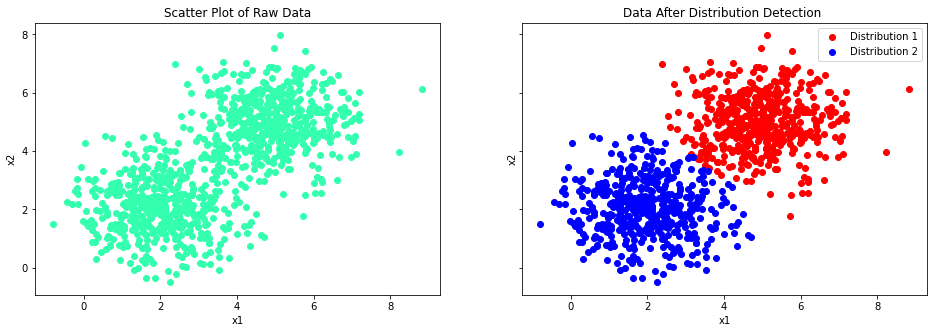

In [4]:

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 5))
ax[0].scatter(data1['x1'], data1['x2'], c='#33FFAF')
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].set_title("Scatter Plot of Raw Data")

ax[1].scatter(data1[data1['distribution'] == 1]['x1'], data1[data1['distribution'] == 1]['x2'], 
              c='r', label="Distribution 1")
ax[1].scatter(data1[data1['distribution'] == 2]['x1'], data1[data1['distribution'] == 2]['x2'], 
              c='b', label="Distribution 2")
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2")
ax[1].set_title("Data After Distribution Detection ")
ax[1].legend()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    ب) تابع شباهت (Likelihood Function)  و لاگ تابع شباهت (Log Likelihood Function) را برای هر دو توزیع نرمال پیاده سازی کنید.</span>
</h4> 
</div>

In [5]:

def Likelihood(mu, sigma, data):
    
    Prod = 1
    for i in range(len(data)):
        x1 = data['x1'][i]
        x2 = data['x2'][i]

        y = np.array([[x1], [x2]])
        p = Probability(y, mu, sigma, 2)
        Prod = Prod * p
        
    return Prod 

##########################################

def Log_Likelihood(mu, sigma, data):
    
    Sum = 1
    for i in range(len(data)):
        x1 = data['x1'][i]
        x2 = data['x2'][i]

        y = np.array([[x1], [x2]])
        p = Probability(y, mu, sigma, 2)
        Sum = Sum + np.log(p) 
        
    return Sum

In [6]:
dist1 = data1[data1['distribution'] == 1].reset_index(drop=True)

print("Likelihood of Distribution 1 = {}".format(Likelihood(mu1, sigma, dist1)))

print("Log Likelihood of Distribution 1 = {}".format(Log_Likelihood(mu1, sigma, dist1)))

Likelihood of Distribution 1 = 0.0
Log Likelihood of Distribution 1 = -1397.710459563805


In [7]:
dist2 = data1[data1['distribution'] == 2].reset_index(drop=True)

print("Likelihood of Distribution 2 = {}".format(Likelihood(mu2, sigma, dist2)))

print("Log Likelihood of Distribution 2 = {}".format(Log_Likelihood(mu2, sigma, dist2)))

Likelihood of Distribution 2 = 0.0
Log Likelihood of Distribution 2 = -1387.26253341264


<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    در این سوال قصد داریم بر روی داده های موجود در فایل insurance.csv یک برازش خطی به روش نزول گرادیانی انجام دهیم و این فایل شامل اطلاعات هزینه درمان اشخاص بر اساس سن ، شاخص bmi و تعداد فرزندان است. آنچه مطلوب است ، پیش بینی هزینه درمان هر شخص بر اساس پارامتر ذکر شده می باشد.  
</span>
</h4> 
    <span style='font-family:"B Nazanin"'>
        <h4>
    الف) هر سه روش GD و SGD و mini-batch GD را بر روی تابع خطای میانگین مربعات پیاده سازی نموده و برای هر کدام از این روش ها ، نمودار تغییرات خطا بر روی کل داده ها را در هر گام به روزرسانی وزن ها رسم نمایید. علت اعوجاج های مشاهده شده در هر نمودار را توضیح دهید. (برای رسم نمودار توجه شود که محور عمودی نشان دهنده میزان خطا برروی کل داده ها بوده و محور افقی نشان دهنده گام های به روزرسانی وزن ها است. ) 
    </h4>
  </span>
  
</div>

In [8]:

def dJ_dF(m, h, y, x):
    
    sum = 0
    for i in range(m):
        sum += (h[i] - y[i]) * x[i]
            
    return (1 / m) * sum

##########################################

def dJ_dc(m, h, y):
    
    sum = 0
    for i in range(m):
        sum += (h[i] - y[i])

    return (1 / m) * sum

##########################################

def MSE(m, h, y):

    sum = 0
    for i in range(m):
        sum += ((h[i] - y[i]) ** 2)
    
    return (1/(2*m))* sum


#### Gradient Descent Cost Function

$
\small{
\begin{equation}
   \begin{split}
    \hat{y}^{(i)} = F_0 + x_1^{(i)}F_1 + x_2^{(i)}F_2 + x_3^{(i)}F_3 
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       {J(F_0, F_1, F_2, F_3)} &= \frac{1}{2m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 \space\space\space\space\space\space ; m = the \space number \space of\space training \space data
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       \frac{\partial J(F_0, F_1, F_2, F_3)}{\partial F_j} &= \frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) x_{j}^{(i)}
   \end{split}
   ; for \space j = 1, 2, 3
   \end{equation}
}   
$

$ 
\small{
\begin{equation}
   \begin{split}
       \frac{\partial J(F_0, F_1, F_2, F_3)}{\partial F_0} &= \frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
   \end{split}
   \end{equation}
}   
$


In [9]:

def Gradient_Descent(train_data, features, y, coef, max_iter=1000, alpha=0.0001):
    
    """
    train_data : traning dataset
    features   : features array for example ['age', 'bmi', 'children']
    y          : target variable and target values 
    coef       : initial Coefficients
    max_iter   : maximum iterations
    alpha      : learning rate
    
    """
    global epsilon
    cost = []
    pred = [0 for i in range(len(train_data))]
    temp = [0 for i in range(len(features) + 1)]
    
    # repeat until convergence
    for epoch in range(max_iter):
        for i in range(len(train_data)):    
            pred[i] = coef[0]
            for j in range(len(features)):
                pred[i] += coef[j + 1] * train_data.loc[i][features[j]]
                
        temp[0] = dJ_dc(len(train_data), pred, y)
        for j in range(len(features)):
            temp[j + 1] = dJ_dF(len(train_data), pred, y, train_data[features[j]])
            
        coef_norm = 0
        for j in range(len(features) + 1): 
            coef_norm += (coef[j] - temp[j]) ** 2
            
        if np.sqrt(coef_norm) < epsilon:
            print("#### Convergence Was Happend ####")
            break 
            
        for j in range(len(features) + 1):
            coef[j] = coef[j] - (alpha * temp[j])

        cost.append(MSE(len(train_data), pred, y))
            
    return (cost, coef)

#### Stochastic Gradient Descent Loss Function

$
\small{
\begin{equation}
   \begin{split}
    \hat{y}^{(i)} = F_0 + x_1^{(i)}F_1 + x_2^{(i)}F_2 + x_3^{(i)}F_3 
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       {L(F)} = \frac{1}{2m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2  \space ; m = the \space number \space of\space training \space data
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       {L_i(F)} &= \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       \frac{\partial L_i(F)}{\partial F_j} &= (\hat{y}^{(i)} - y^{(i)}) x_{j}^{(i)}
   \end{split}
   \space\space\space\space; for \space j = 1, 2, 3
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       \frac{\partial L_i(F)}{\partial F_0} &= (\hat{y}^{(i)} - y^{(i)})
   \end{split}
   \end{equation}
}   
$


In [10]:

def Stochastic_Gradient_Descent(train_data, features, y, coef, max_iter=1000, alpha=0.0001):
    
    """
    train_data : traning dataset
    features   : features array for example ['age', 'bmi', 'children']
    y          : target variable and target values 
    coef       : initial Coefficients
    max_iter   : maximum iterations
    alpha      : learning rate
    
    """
    global epsilon
    cost = []
    pred = [0 for i in range(len(train_data))]
    temp = [0 for i in range(len(features) + 1)]
    
    # repeat until convergence
    for epoch in range(max_iter):  
        r = random.randint(0, len(train_data) - 1)
        pred = coef[0]
        for j in range(len(features)):
            pred += coef[j + 1] * train_data.loc[r][features[j]]
        
        temp[0] = (pred - y[r])
        for j in range(len(features)):
            temp[j + 1] = (pred - y[r]) * train_data.loc[r][features[j]]
        
        coef_norm = 0
        for j in range(len(features) + 1): 
            coef_norm += (coef[j] - temp[j]) ** 2
            
        if np.sqrt(coef_norm) < epsilon:
            print("#### Convergence Was Happend ####")
            break 
        
        for j in range(len(features) + 1):
            coef[j] = coef[j] - (alpha * temp[j])
            
        cost.append(0.5 * ((pred - y[r]) ** 2))

    return (cost, coef)


#### Minibatch Gradient Descent Cost Function

$
\small{
\begin{equation}
   \begin{split}
    \hat{y}^{(i)} = F_0 + x_1^{(i)}F_1 + x_2^{(i)}F_2 + x_3^{(i)}F_3 
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       {J(F_0, F_1, F_2, F_3)} &= \frac{1}{2m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})^2 \space\space\space\space\space\space ; m = the \space number \space of\space batch \space size
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       \frac{\partial J(F_0, F_1, F_2, F_3)}{\partial F_j} &= \frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)}) x_{j}^{(i)}
   \end{split}
   ; for \space j = 1, 2, 3
   \end{equation}
}   
$

$ 
\small{
\begin{equation}
   \begin{split}
       \frac{\partial J(F_0, F_1, F_2, F_3)}{\partial F_0} &= \frac{1}{m}\sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
   \end{split}
   \end{equation}
}   
$


In [11]:

def MiniBatch_Gradient_Descent(train_data, features, y, coef, batch_size=100, max_iter=1000, alpha=0.0001):
    
    """
    train_data : traning dataset
    features   : features array for example ['age', 'bmi', 'children']
    y          : target variable and target values 
    coef       : initial Coefficients
    max_iter   : maximum iterations
    alpha      : learning rate
    batch_size : the size of batches
    
    """
    global epsilon
    cost = []
    pred = [0 for i in range(len(train_data))]
    temp = [0 for i in range(len(features) + 1)]
    
    # repeat until convergence
    for epoch in range(max_iter):
        shuffle = train_data.sample(frac=1).reset_index(drop=True)
        shuffle = shuffle[:batch_size]
        for i in range(len(shuffle)):    
            pred[i] = coef[0]
            for j in range(len(features)):
                pred[i] += coef[j + 1] * shuffle.loc[i][features[j]]
                
        temp[0] = dJ_dc(len(shuffle), pred, y)
        for j in range(len(features)):
            temp[j + 1] = dJ_dF(len(shuffle), pred, y, shuffle[features[j]])
        
        coef_norm = 0
        for j in range(len(features) + 1): 
            coef_norm += (coef[j] - temp[j]) ** 2
            
        if np.sqrt(coef_norm) < epsilon:
            print("#### Convergence Was Happend ####")
            break 
        
        for j in range(len(features) + 1):
            coef[j] = coef[j] - (alpha * temp[j])

        cost.append(MSE(len(shuffle), pred, y))
        
    return (cost, coef)

In [16]:
insurance = pd.read_csv('insurance.csv')
x = insurance[['age', 'bmi', 'children']]
y = insurance['charges']
cost = [0 for i in range(8)]
coef = [0 for i in range(8)]

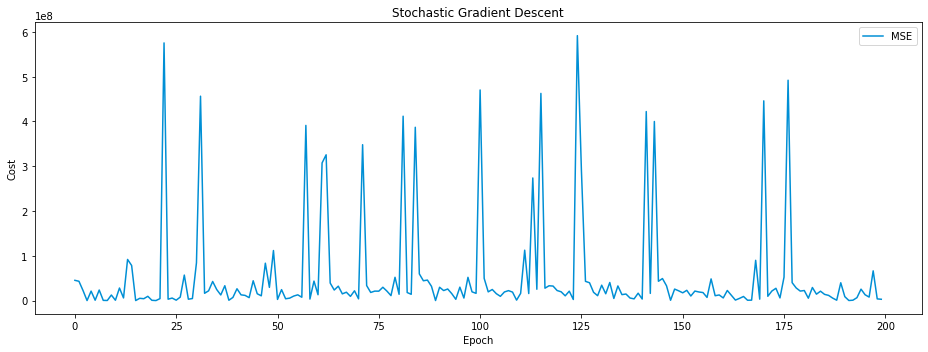

In [13]:
epsilon = 50
start = time.time()
cost[0],coef[0] = Stochastic_Gradient_Descent(x, x.columns, y, [20, 20, 20, 20], max_iter=200, alpha=0.00003)
stop  = time.time()
SGD_time = stop - start

plt.figure(figsize=(13, 5))
plt.plot(range(len(cost[0])), cost[0], c="#008fd5", label="MSE")

plt.title("Stochastic Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.tight_layout()
plt.legend()
plt.show()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
علت اعوجاج های رخ داده در نمودار این است که در هر مرحله از Stochastic Gradient Descent تنها یک داده رندوم انتخاب شده و پارامتر ها صرفا براساس یک داده به روز رسانی می شوند. 
</span>
</h4> 
  
</div>

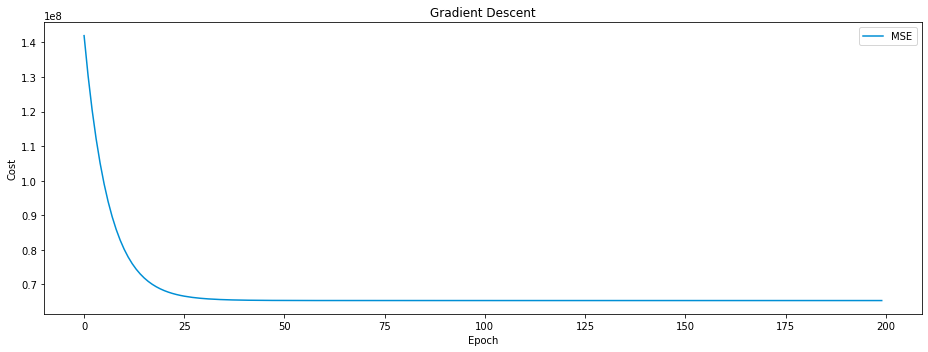

In [14]:

start = time.time()
cost[1],coef[1] = Gradient_Descent(x, x.columns, y, [20, 20, 20, 20], max_iter=200, alpha=0.00003)
stop  = time.time()
GD_time = stop - start

plt.figure(figsize=(13, 5))
plt.plot(range(len(cost[1])), cost[1], c="#008fd5", label="MSE")

plt.title("Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.tight_layout()
plt.legend()
plt.show()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
در نمودار Gradient Descent  بدون وجود اعوجاج در هر مرحله مقدار تابع هزینه نسبت به مرحله پیشین کاهش یافته و در صورتی که نرخ یادگیری در حد مناسب باشد نمودار تابع هزینه بر حسب هر گام یک نمودار نزولی با شیب ملایم و به صورت فوق خواهد بود. واضح هست چنانچه نرخ یادگیری بزرگتر باشد شیب نمودار بیشتر شده و در صورتی که نرخ یادگیری کمتر باشد شیب نمودار کاهش یافته و به نمودار خطی نزدیک تر میگردد.
</span>
</h4> 
  
</div>

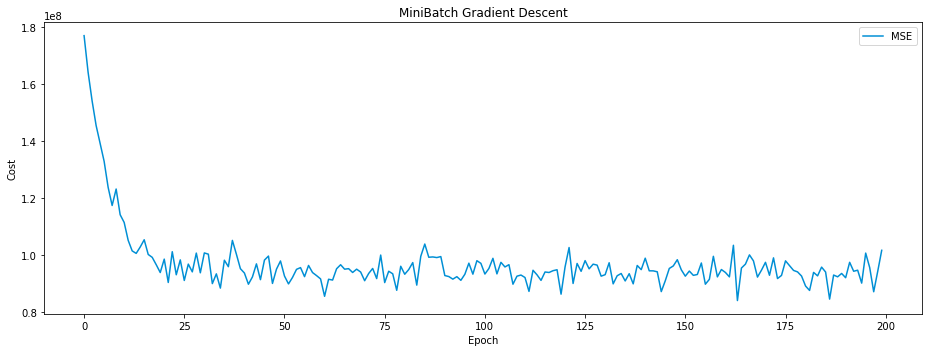

In [15]:

start = time.time()
cost[2],coef[2] = MiniBatch_Gradient_Descent(x, x.columns, y, [20, 20, 20, 20], 100, max_iter=200, alpha=0.00003)
stop  = time.time()
MBGD_time = stop - start

plt.figure(figsize=(13, 5))
plt.plot(range(len(cost[2])), cost[2], c="#008fd5", label="MSE")

plt.title("MiniBatch Gradient Descent")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.tight_layout()
plt.legend()
plt.show()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
در نمودار MiniBatch Gradient Descent فرم کلی نمودار مشابه نمودار Gradient Descent بوده با این تفاوت که بر روی شکل کلی نمودار اعوجاج هایی مشابه نمودار Sticastic Gradient Descent وجود دارد علت وجود این اعوجاج ها همچنان این قضیه است که در هر بار به روز رسانی پارامتر ها تمامی داده ها مد نظر قرار نمی گیرند و صرفا تابع هزینه بر اساس دسته ای از داده ها محاسبه می شود. 
</span>
</h4> 
  
</div>
<hr>

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    ب) سه روش پیاده سازی شده در قسمت قبل را از نظر سرعت همگرایی و کمینه خطا با یکدیگر مقایسه کنید.
</span>
</h4> 
  
</div>

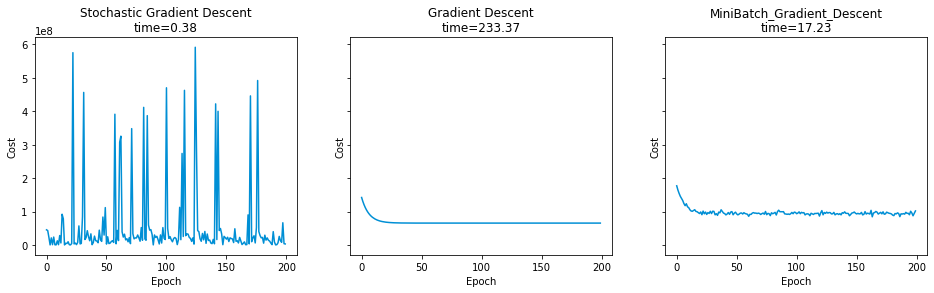

In [16]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(16, 4))
label = ["Stochastic Gradient Descent", "Gradient Descent", "MiniBatch_Gradient_Descent"]
conv_time = [SGD_time, GD_time, MBGD_time]

for i in range(3):
    ax[i].plot(range(len(cost[i])), cost[i], c="#008fd5")
    ax[i].set_ylabel("Cost")
    ax[i].set_xlabel("Epoch")
    ax[i].set_title(label[i] + '\ntime=' + str(np.round(conv_time[i], 2)))

In [17]:
print("Optimized Coefs For Stochastic Gradient Descent After 200 Iteration")
print("\033[1m","F0={}, F1={}, F2={}, F3={}\n".format(coef[0][0], coef[0][1], coef[0][2], coef[0][3]),"\033[0m")
print("Optimized MSE For Stochastic Gradient Descent After 200 Iteration")
print("\033[1m","MSE={}\n".format(cost[0][-1]),"\033[0m")

print("Optimized Coefs For Gradient Descent After 200 Iteration")
print("\033[1m","F0={}, F1={}, F2={}, F3={}\n".format(coef[1][0], coef[1][1], coef[1][2], coef[1][3]),"\033[0m")
print("Optimized MSE For Gradient Descent After 200 Iteration")
print("\033[1m","MSE={}\n".format(cost[1][-1]),"\033[0m")

print("Optimized Coefs For Minibatch Gradient Descent After 200 Iteration")
print("\033[1m","F0={}, F1={}, F2={}, F3={}\n".format(coef[2][0], coef[2][1], coef[2][2], coef[2][3]),"\033[0m")
print("Optimized MSE For Minibatch Gradient Descent After 200 Iteration")
print("\033[1m","MSE={}\n".format(cost[2][-1]),"\033[0m")

Optimized Coefs For Stochastic Gradient Descent After 200 Iteration
 F0=22.13504116101921, F1=174.66124835048308, F2=103.83088681700593, F3=23.35449897236658
 
Optimized MSE For Stochastic Gradient Descent After 200 Iteration
 MSE=2896837.3784638625
 
Optimized Coefs For Gradient Descent After 200 Iteration
 F0=23.407612181620905, F1=212.05659778742634, F2=166.2975370255512, F3=28.49835441325954
 
Optimized MSE For Gradient Descent After 200 Iteration
 MSE=65332554.2212762
 
Optimized Coefs For Minibatch Gradient Descent After 200 Iteration
 F0=29.04534618381272, F1=162.4614535928457, F2=242.5212265695761, F3=28.115573590202395
 
Optimized MSE For Minibatch Gradient Descent After 200 Iteration
 MSE=101742540.83079785
 


 <div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    ج) برای روش GD ، برازش را یکبار با پارامترهای اولیه صفر و بار دیگر با مقداردهی تصادفی انجام داده و این دو روش مقداردهی را با یکدیگر مقایسه کنید.
</span>
</h4> 
  
</div>

In [18]:

coef_arr = []
for i in range(4):
    coef_arr.append(random.randint(0, 100))

r_cost, r_coefs = Gradient_Descent(x, x.columns, y, coef_arr, max_iter=200, alpha=0.00003)
z_cost, z_coefs = Gradient_Descent(x, x.columns, y, [0, 0, 0, 0], max_iter=200, alpha=0.00003)

Text(0.5, 1.0, 'Zero Initial Coef')

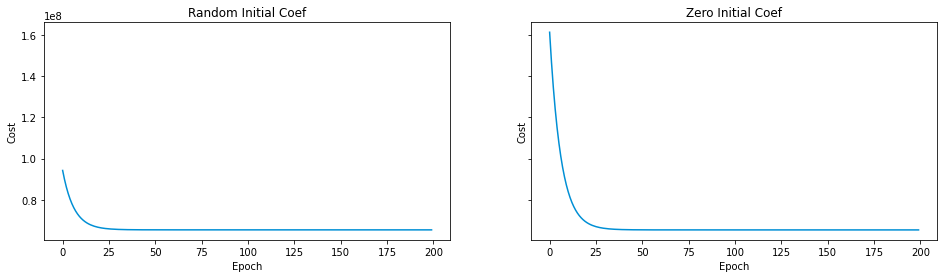

In [19]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 4))

ax[0].plot(range(len(r_cost)), r_cost, c="#008fd5")
ax[0].set_ylabel("Cost")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Random Initial Coef")

ax[1].plot(range(len(z_cost)), z_cost, c="#008fd5")
ax[1].set_ylabel("Cost")
ax[1].set_xlabel("Epoch")
ax[1].set_title("Zero Initial Coef")

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
مطابق نمودار های فوق به این سبب که مقدار بهینه تمام پارامتر ها در مدل رگرسیون نهایی وبهینه شده این سوال مثبت است لذا به وضوح می توان دید که چنانچه مقادیر اولیه ضرایب صفر داده شود مقدار اولیه تابع هزینه بزرگتر از زمانی خواهد بود که مقادیر اولیه ضرایب به صورت رندوم انتخاب شود. و لذا در حالت انتخاب رندوم، ضرایب زودتر به حالت بهینه همگرا می شوند. البته این رخداد همیشگی نیست اگر فرض شود در یک مسئله برخی از ضرایب نهایی مقدار منفی داشته باشند و یا مقادیر اولیه رندوم از مقدار بهینه ضرایب بزرگتر باشند در این صورت ممکن است مقدار دهی اولیه با صفر منجر به زودتر همگرا شدن نمودار شود.

</span>
</h4> 
  
</div>

<hr>

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    د) یک بار دیگر عمل برازش را با در نظر گرفتن تابع خطای MAE و به روش SGD پیاده سازی نموده و با تابع خطای MSE مقایسه نمایید در طول به روزرسانی وزن ها چند بار به نقاط مشتق ناپذیر برخورد کردید؟ اگر برخورد کردید راه حل شما چه بود ؟ 

</span>
</h4> 
  
</div>



#### Stochastic Gradient Descent Loss Function

$
\small{
\begin{equation}
   \begin{split}
    \hat{y}^{(i)} = F_0 + x_1^{(i)}F_1 + x_2^{(i)}F_2 + x_3^{(i)}F_3 
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       {L(F)} = \frac{1}{m}\sum_{i=1}^m |\hat{y}^{(i)} - y^{(i)}|  \space ; m = the \space number \space of\space training \space data
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
       {L_i(F)} &=|\hat{y}^{(i)} - y^{(i)}|
   \end{split}
   \end{equation}
}   
$

$
\small{
\begin{equation}
   \begin{split}
               \frac{\partial L_i(F)}{\partial F_j} &= \begin{cases}
                x^{(i)} &\quad \hat{y}^{(i)} \geq y^{(i)} \\
                -x^{(i)} &\quad \hat{y}^{(i)} < y^{(i)} 
        \end{cases} \\
        \frac{\partial L_i(F)}{\partial F_0} &= \begin{cases}
                1 &\quad \space\space\space   \hat{y}^{(i)} \geq y^{(i)} \\
                -1 &\quad \space\space\space   \hat{y}^{(i)} < y^{(i)} 
        \end{cases}
    \end{split}
\end{equation}
}
$


In [20]:

def Stochastic_Gradient_Descent_MAE(train_data, features, y, coef, max_iter=1000, alpha=0.0001):
    
    """
    train_data : traning dataset
    features   : features array for example ['age', 'bmi', 'children']
    y          : target variable and target values 
    coef       : initial Coefficients
    max_iter   : maximum iterations
    alpha      : learning rate
    
    """
    global epsilon
    cost = []
    pred = [0 for i in range(len(train_data))]
    temp = [0 for i in range(len(features) + 1)]
    
    # repeat until convergence
    for epoch in range(max_iter):  
        r = random.randint(0, len(train_data) - 1)
        pred = coef[0]
        for j in range(len(features)):
            pred += coef[j + 1] * train_data.loc[r][features[j]]
        
        temp[0] = 1 if pred >= y[r] else -1
        for j in range(len(features)):
            temp[j + 1] = train_data.loc[r][features[j]] if pred >= y[r] else -train_data.loc[r][features[j]]
            
        coef_norm = 0
        for j in range(len(features) + 1): 
            coef_norm += (coef[j] - temp[j]) ** 2
            
        if np.sqrt(coef_norm) < epsilon:
            print("#### Convergence Was Happend ####")
            break 
            
        for j in range(len(features) + 1):
            coef[j] = coef[j] - (alpha * temp[j])
            
        cost.append(0.5 * ((pred - y[r]) ** 2))

    return (cost, coef)

#### Convergence Was Happend ####


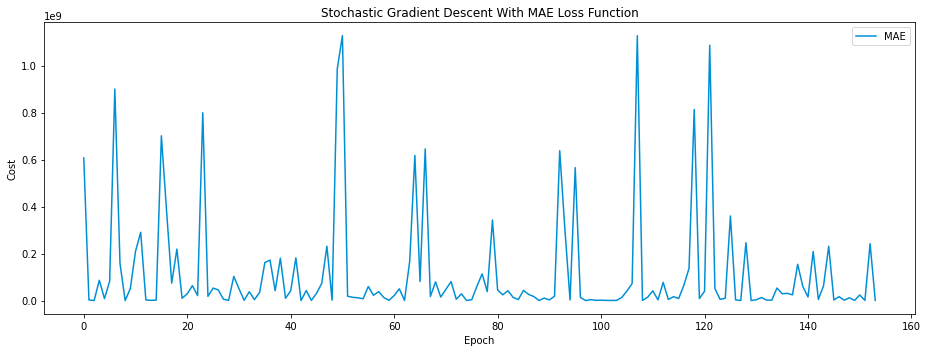

In [34]:

start = time.time()
cost[3], coef[3] = Stochastic_Gradient_Descent_MAE(x, x.columns, y, [20, 20, 20, 20], max_iter=200, alpha=0.00003)
stop  = time.time()
SGD_time_MAE = stop - start

plt.figure(figsize=(13, 5))
plt.plot(range(len(cost[3])), cost[3], c="#008fd5", label="MAE")

plt.title("Stochastic Gradient Descent With MAE Loss Function")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.tight_layout()
plt.legend()
plt.show()

In [35]:
print("Optimized Coefs For Stochastic Gradient Descent With MSE cost Function")
print("\033[1m","F0={}, F1={}, F2={}, F3={}\n".format(coef[0][0], coef[0][1], coef[0][2], coef[0][3]),"\033[0m")
print("Optimized MSE For Stochastic Gradient Descent With MSE cost Function")
print("\033[1m","MSE={}\n".format(cost[0][-1]),"\033[0m")

print("Optimized Coefs For Stochastic Gradient Descent With MAE cost Function")
print("\033[1m","F0={}, F1={}, F2={}, F3={}\n".format(coef[3][0], coef[3][1], coef[3][2], coef[3][3]),"\033[0m")
print("Optimized MSE For Stochastic Gradient Descent With MAE cost Function")
print("\033[1m","MAE={}\n".format(cost[3][-1]),"\033[0m")

Optimized Coefs For Stochastic Gradient Descent With MSE cost Function
 F0=22.13504116101921, F1=174.66124835048308, F2=103.83088681700593, F3=23.35449897236658
 
Optimized MSE For Stochastic Gradient Descent With MSE cost Function
 MSE=2896837.3784638625
 
Optimized Coefs For Stochastic Gradient Descent With MAE cost Function
 F0=20.004619999999825, F1=20.181470000000015, F2=20.139159799999987, F3=20.004800000000003
 
Optimized MSE For Stochastic Gradient Descent With MAE cost Function
 MAE=781682.9241010249
 



<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
به نقاط مشتق ناپذیر برخورد نکردیم به سبب استفاده از subgradient و برای MAE از رابطه نوشته شده در فوق استفاده نمودیم.
</span>
</h4> 
  
</div>


 <div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    ه) با آزمایش نشان دهید اگر نرخ یادگیری بزرگ باشد مدل همگرا نمی شود.
</span>
</h4> 
  
</div>

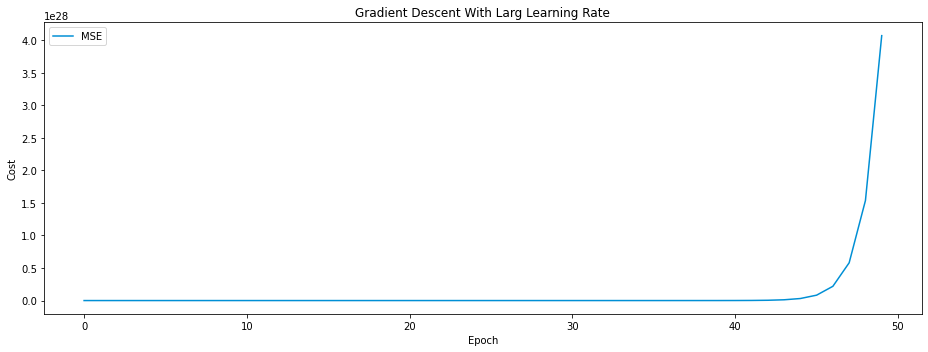

In [20]:
cost[4], coef[4] = Gradient_Descent(x, x.columns, y, [20, 20, 20, 20], max_iter=50, alpha=0.001)
plt.figure(figsize=(13, 5))
plt.plot(range(len(cost[4])), cost[4], c="#008fd5", label="MSE")

plt.title("Gradient Descent With Larg Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.tight_layout()
plt.legend()
plt.show()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
در نمودار فوق به وضوح می توان دید که نرخ یادگیری بزرگ منجر به صعودی شدن نمودار هزینه بر حسب هر گام شده و نرخ یادگیری بزرگ مانع از همگرایی ضرایب و بهینه شدن تابع هزینه گشته است.
</span>
</h4> 
  
</div>

 <div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    و) با آزمایش نشان دهید در صورت کوچک بودن نرخ یادگیری ، سرعت همگرایی کاهش می یابد.
</span>
</h4> 
  
</div>

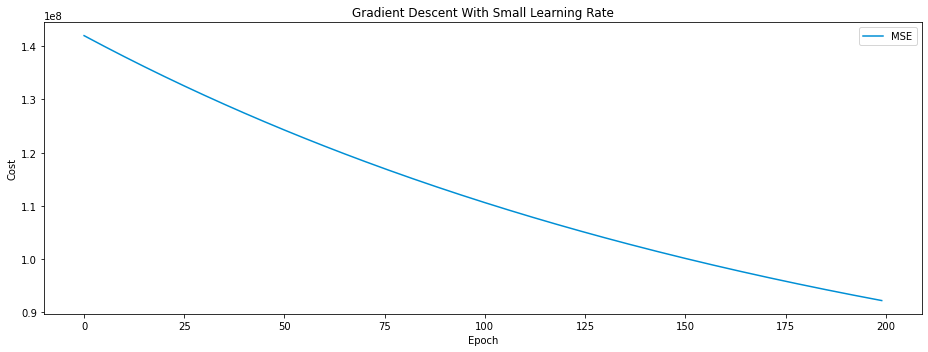

In [14]:
cost[5], coef[5] = Gradient_Descent(x, x.columns, y, [20, 20, 20, 20], max_iter=200, alpha=0.000001)
plt.figure(figsize=(13, 5))
plt.plot(range(len(cost[5])), cost[5], c="#008fd5", label="MSE")

plt.title("Gradient Descent With Small Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.tight_layout()
plt.legend()
plt.show()

<div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
در نمودار فوق به وضوح می توان دید که نرخ یادگیری بسیار کوچک منجر به کاهش سرعت همگرایی و کاهش شیب نمودار مقدار تابع هزینه بر حسب هر گام می شود و نمودار به حالت خطی میل پیدا می کند.
</span>
</h4> 
  
</div>

 <div style="direction:rtl;", align="justify" ><h4>
<span style='font-family:"B Nazanin"'>
    ز) با نرمال کردن داده های ورودی و به روش SGD یک بار دیگر عمل برازش را انجام داده و نمودار خطا را رسم نمایید. همچنین سرعت  همگرایی را با حالت قبل (بدون نرمال سازی ورودی) مقایسه کنید.
</span>
</h4> 
  
</div>
$$
\small{
    X^{*} = \frac{X - \mu}{\sigma}
}
$$

In [18]:

def Normalize(train_data):
    
    """
    train_data : traning dataset
    
    """
    return (train_data - np.mean(train_data, axis=0)) / np.std(train_data, axis=0)
            

Text(0.5, 1.0, 'Stochastic Gradient Descent On Normalized Data')

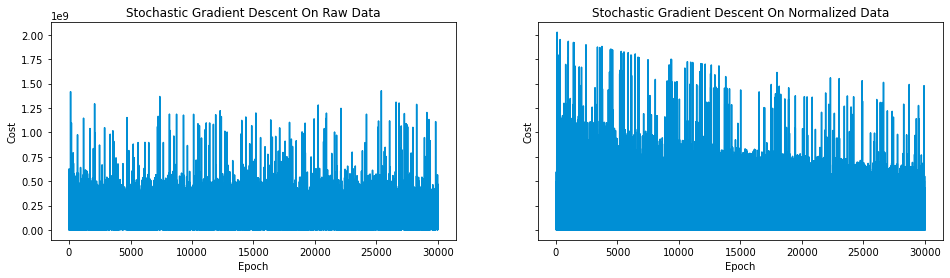

In [25]:
normal_x = Normalize(x)
cost[6], coef[6] = Stochastic_Gradient_Descent(normal_x, normal_x.columns, y, coef=[20]*4, max_iter=30000, alpha=0.00003)

cost[7], coef[7] = Stochastic_Gradient_Descent(x, x.columns, y, coef=[20]*4, max_iter=30000, alpha=0.00003)

fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16, 4))

ax[0].plot(range(len(cost[7])), cost[7], c="#008fd5")
ax[0].set_ylabel("Cost")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Stochastic Gradient Descent On Raw Data")

ax[1].plot(range(len(cost[6])), cost[6], c="#008fd5")
ax[1].set_ylabel("Cost")
ax[1].set_xlabel("Epoch")
ax[1].set_title("Stochastic Gradient Descent On Normalized Data")